In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

url='https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-heberman.csv'
df = pd.read_csv(url)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df.head(5)

,age,operation_year,axil_nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
features=['age','operation_year','axil_nodes']
x=df[features]
df['status']=df['status'].map({1:0, 2:1})
y=df.status

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
print('Coefficients:', logreg.coef_)
print('Intercept:', logreg.intercept_)
 
predictions = logreg.predict(x_test)
print('Classification Report:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test,predictions ))

Coefficients: [[ 0.01558675 -0.03293527  0.07053309]]
Intercept: [-0.00057878]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90        60
           1       1.00      0.18      0.30        17

    accuracy                           0.82        77
   macro avg       0.91      0.59      0.60        77
weighted avg       0.85      0.82      0.76        77

Confusion Matrix:
 [[60  0]
 [14  3]]
Accuracy Score: 0.8181818181818182
Precision: 1.0
Recall: 0.17647058823529413


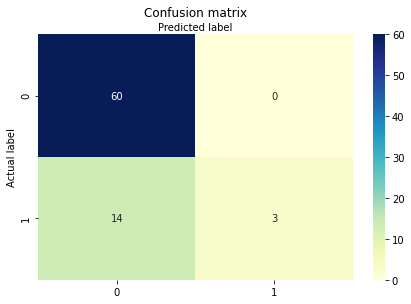

In [6]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
###create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, predictions)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

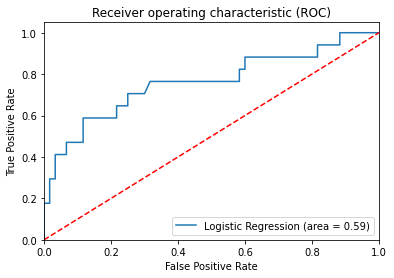

In [7]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [8]:
new_observation = [[35,64, 15]]
logreg.predict(new_observation)

array([0])

In [9]:
logreg.predict_proba(new_observation)

array([[0.62361094, 0.37638906]])